## Import Libraries

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Import data set

In [28]:
df = pd.read_csv('../raw/earthquick/unClean/japan_earthquakes_combined_filtered.csv')

## Check data set info

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41457 entries, 0 to 41456
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   time             41457 non-null  object 
 1   latitude         41457 non-null  float64
 2   longitude        41457 non-null  float64
 3   depth            41457 non-null  float64
 4   mag              41457 non-null  float64
 5   magType          41457 non-null  object 
 6   nst              22342 non-null  float64
 7   gap              29225 non-null  float64
 8   dmin             12123 non-null  float64
 9   rms              40576 non-null  float64
 10  net              41457 non-null  object 
 11  id               41457 non-null  object 
 12  updated          41457 non-null  object 
 13  place            41457 non-null  object 
 14  type             41457 non-null  object 
 15  horizontalError  10808 non-null  float64
 16  depthError       25275 non-null  float64
 17  magError    

In [30]:
df.isnull().sum()

time                   0
latitude               0
longitude              0
depth                  0
mag                    0
magType                0
nst                19115
gap                12232
dmin               29334
rms                  881
net                    0
id                     0
updated                0
place                  0
type                   0
horizontalError    30649
depthError         16182
magError           29509
magNst              5916
status                 0
locationSource         0
magSource              0
dtype: int64

## Check missing values

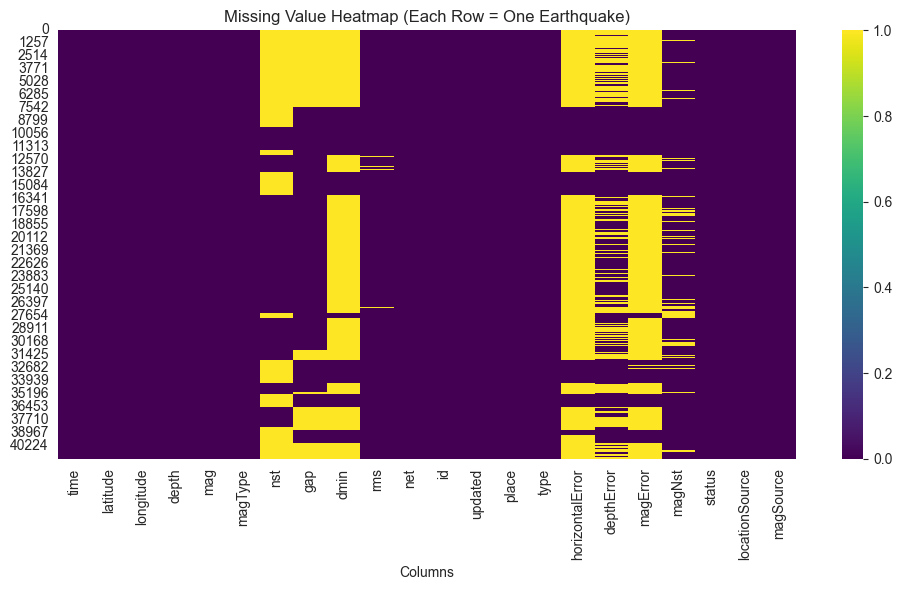

In [31]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=True, cmap='viridis')
plt.title('Missing Value Heatmap (Each Row = One Earthquake)')
plt.xlabel('Columns')
plt.tight_layout()
plt.show()

## Correlation heatmap of numerical features

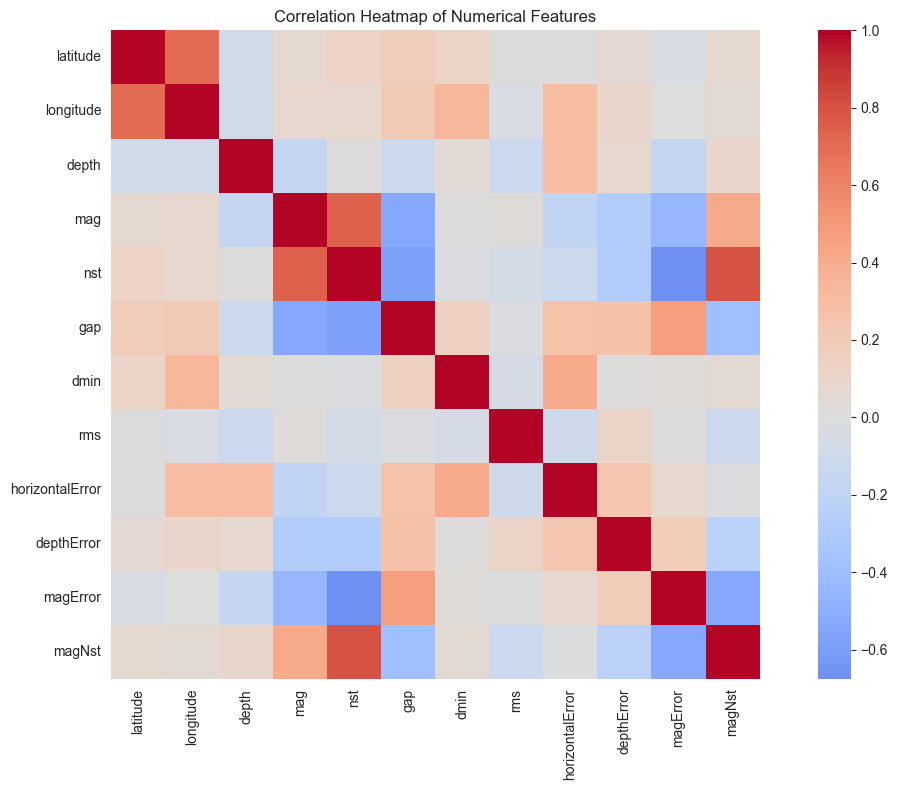

In [32]:
# Select only numerical columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Compute correlation matrix
corr_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', center=0, square=True)
plt.title('Correlation Heatmap of Numerical Features')
plt.tight_layout()
plt.show()

## Magnitude Distrubution

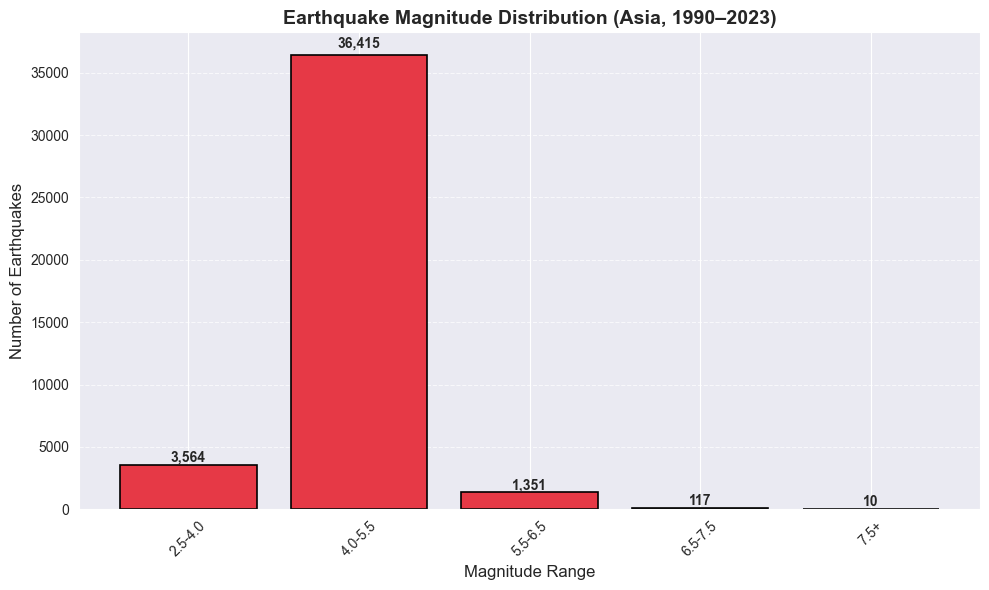

In [33]:
bins = [2.5, 4.0, 5.5, 6.5, 7.5, 10.0]
labels = ['2.5-4.0', '4.0-5.5', '5.5-6.5', '6.5-7.5', '7.5+']

# Group magnitudes into bins
df['mag_bin'] = pd.cut(df['mag'], bins=bins, labels=labels, right=False)

# Get counts and percentages
dist = df['mag_bin'].value_counts().sort_index()
pct = (dist / len(df) * 100).round(2)

# Plot
plt.figure(figsize=(10, 6))
bars = plt.bar(dist.index, dist.values, color='#E63946', edgecolor='black', linewidth=1.2)

# Add count labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2., height + height * 0.01,
             f'{int(height):,}', ha='center', va='bottom', fontweight='bold')

plt.title('Earthquake Magnitude Distribution (Asia, 1990–2023)', fontsize=14, fontweight='bold')
plt.xlabel('Magnitude Range', fontsize=12)
plt.ylabel('Number of Earthquakes', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Drop irrelevant columns

In [34]:
cols_to_drop = [
    'id',
    'updated',
    'net',
    'place',
    'type',
    'status',
    'locationSource',
    'magSource',
    'dmin',
    'horizontalError',
    'magError',
    'mag_bin'
]

df_clean = df.drop(columns=cols_to_drop)

In [35]:
df_clean.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,rms,depthError,magNst
0,1995-12-30T23:19:36.080Z,27.958,130.181,23.4,3.4,mb,NaN,NaN,1.0,9.9,2.0
1,1995-12-30T20:45:14.190Z,40.831,143.190,30.1,5.7,mw,NaN,NaN,1.0,NaN,NaN
2,1995-12-30T16:15:33.090Z,31.025,140.136,116.9,5.3,mw,NaN,NaN,0.9,NaN,NaN
3,1995-12-30T12:23:13.400Z,25.576,124.919,33.0,5.4,mb,NaN,NaN,1.3,NaN,27.0
4,1995-12-30T12:17:37.040Z,40.745,143.232,33.0,5.7,mb,NaN,NaN,1.1,NaN,104.0


## Convert time into month,day,hours

In [36]:
df_clean['time'] = pd.to_datetime(df_clean['time'])
df_clean['year'] = df_clean['time'].dt.year
df_clean['month'] = df_clean['time'].dt.month
df_clean['day'] = df_clean['time'].dt.day
df_clean['hour'] = df_clean['time'].dt.hour

In [37]:
df_clean = df_clean.drop(columns=['time'])

## Fill missing values - nst,gap,rms,magNst,depthError

In [38]:
df_clean['nst'] = df_clean['nst'].fillna(df_clean['nst'].median())
df_clean['gap'] = df_clean['gap'].fillna(df_clean['gap'].median())
df_clean['rms'] = df_clean['rms'].fillna(df_clean['rms'].median())
df_clean['depthError'] = df_clean['depthError'].fillna(df_clean['depthError'].median())
df_clean['magNst'] = df_clean['magNst'].fillna(df_clean['magNst'].median())

In [39]:
df_clean.head()

,latitude,longitude,depth,mag,magType,nst,gap,rms,depthError,magNst,year,month,day,hour
0,27.958,130.181,23.4,3.4,mb,31.0,121.7,1.0,9.9,2.0,1995,12,30,23
1,40.831,143.190,30.1,5.7,mw,31.0,121.7,1.0,6.9,11.0,1995,12,30,20
2,31.025,140.136,116.9,5.3,mw,31.0,121.7,0.9,6.9,11.0,1995,12,30,16
3,25.576,124.919,33.0,5.4,mb,31.0,121.7,1.3,6.9,27.0,1995,12,30,12
4,40.745,143.232,33.0,5.7,mb,31.0,121.7,1.1,6.9,104.0,1995,12,30,12


In [40]:
df_clean.isnull().sum()

latitude      0
longitude     0
depth         0
mag           0
magType       0
nst           0
gap           0
rms           0
depthError    0
magNst        0
year          0
month         0
day           0
hour          0
dtype: int64

## Check Null value using heat map again

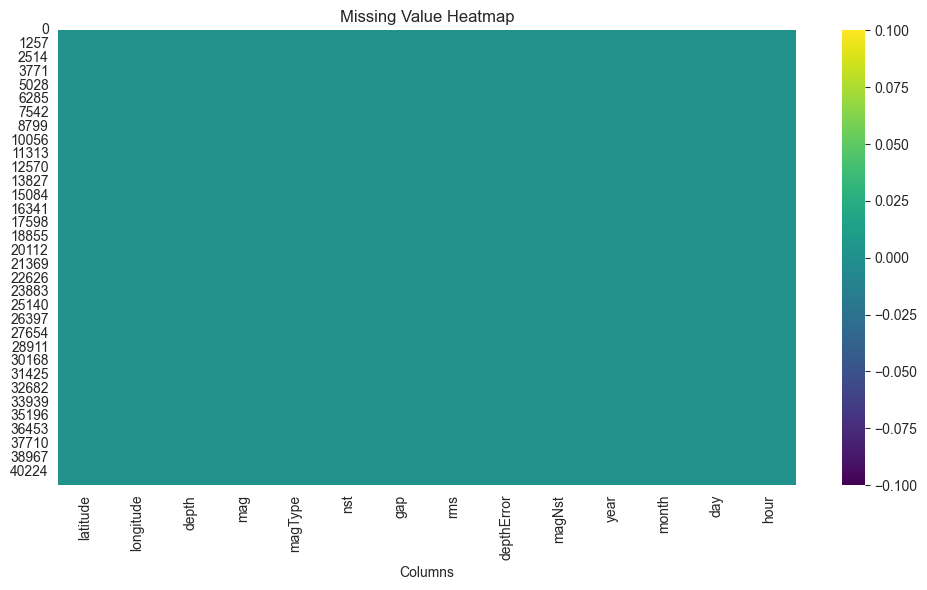

In [41]:
plt.figure(figsize=(10, 6))
sns.heatmap(df_clean.isnull(), cbar=True, cmap='viridis')
plt.title('Missing Value Heatmap')
plt.xlabel('Columns')
plt.tight_layout()
plt.show()

## Feature engineering

In [42]:
# Cyclical time (for periodicity)
df_clean['month_sin'] = np.sin(2 * np.pi * df_clean['month'] / 12)
df_clean['month_cos'] = np.cos(2 * np.pi * df_clean['month'] / 12)

df_clean['hour_sin'] = np.sin(2 * np.pi * df_clean['hour'] / 24)
df_clean['hour_cos'] = np.cos(2 * np.pi * df_clean['hour'] / 24)

# Create clusters
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=10, random_state=42, n_init=10)
df_clean['region'] = kmeans.fit_predict(df_clean[['latitude', 'longitude']])

#Drop month,hour and day
df_clean = df_clean.drop(columns=['month', 'hour', 'day'], errors='ignore')

In [43]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41457 entries, 0 to 41456
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   latitude    41457 non-null  float64
 1   longitude   41457 non-null  float64
 2   depth       41457 non-null  float64
 3   mag         41457 non-null  float64
 4   magType     41457 non-null  object 
 5   nst         41457 non-null  float64
 6   gap         41457 non-null  float64
 7   rms         41457 non-null  float64
 8   depthError  41457 non-null  float64
 9   magNst      41457 non-null  float64
 10  year        41457 non-null  int32  
 11  month_sin   41457 non-null  float64
 12  month_cos   41457 non-null  float64
 13  hour_sin    41457 non-null  float64
 14  hour_cos    41457 non-null  float64
 15  region      41457 non-null  int32  
dtypes: float64(13), int32(2), object(1)
memory usage: 4.7+ MB


## One-hot encoding for magnitude type

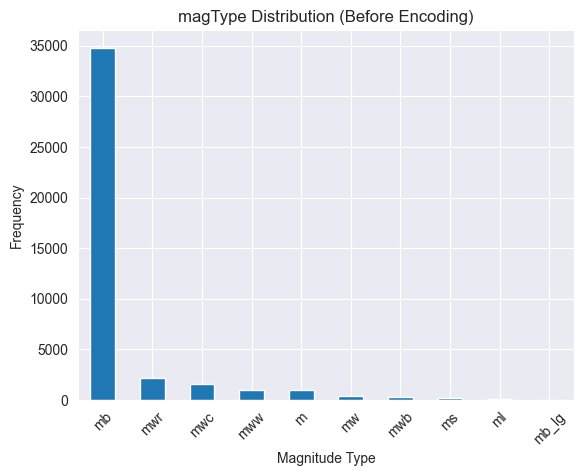

In [44]:
df['magType'].value_counts().plot(kind='bar', title='magType Distribution (Before Encoding)')
plt.xlabel('Magnitude Type')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

In [45]:
print("Unique magType values:")
print(df_clean['magType'].value_counts())
print("\nTotal number of unique magTypes:", df_clean['magType'].nunique())

Unique magType values:
magType
mb       34791
mwr       2166
mwc       1618
mww        978
m          962
mw         411
mwb        317
ms         167
ml          44
mb_lg        3
Name: count, dtype: int64

Total number of unique magTypes: 10


In [46]:
# Simplify magType: keep top 3, group rest as 'Other'
top_types = ['mb', 'ml', 'md']
df_clean['magType_simple'] = df_clean['magType'].apply(
    lambda x: x if x in top_types else 'Other'
)

# Drop existing mag_ columns if they exist
existing_mag_cols = [col for col in df_clean.columns if col.startswith('mag_')]
if existing_mag_cols:
    df_clean = df_clean.drop(columns=existing_mag_cols)

# One-hot encode
df_clean = pd.get_dummies(df_clean, columns=['magType_simple'], prefix='mag')

# Convert to int (boolean 1/0)
mag_columns = [col for col in df_clean.columns if col.startswith('mag_')]
df_clean[mag_columns] = df_clean[mag_columns].astype(int)

In [47]:
print("Mag columns (int 1/0):")
print(df_clean[mag_columns].sum().sort_values(ascending=False))
print("\nData types:")
print(df_clean[mag_columns].dtypes)

Mag columns (int 1/0):
mag_mb       34791
mag_Other     6622
mag_ml          44
dtype: int64

Data types:
mag_Other    int64
mag_mb       int64
mag_ml       int64
dtype: object


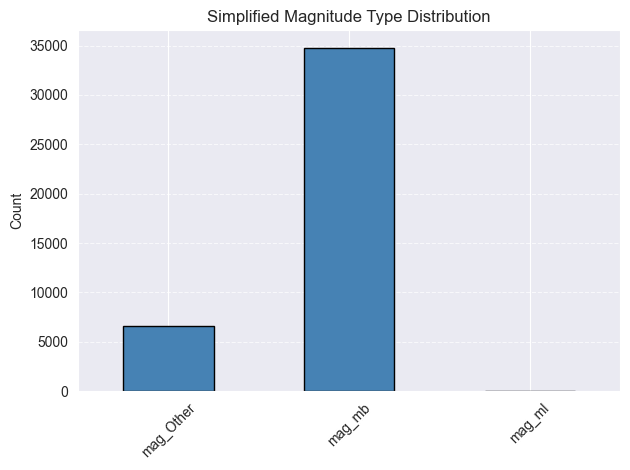

In [48]:
df_clean.filter(like='mag_').sum().plot(kind='bar', color='steelblue', edgecolor='black')
plt.title('Simplified Magnitude Type Distribution')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [49]:
df_clean.head()

,latitude,longitude,depth,mag,magType,nst,gap,rms,depthError,magNst,year,month_sin,month_cos,hour_sin,hour_cos,region,mag_Other,mag_mb,mag_ml
0,27.958,130.181,23.4,3.4,mb,31.0,121.7,1.0,9.9,2.0,1995,-2.449294e-16,1.0,-2.588190e-01,0.965926,1,0,1,0
1,40.831,143.190,30.1,5.7,mw,31.0,121.7,1.0,6.9,11.0,1995,-2.449294e-16,1.0,-8.660254e-01,0.500000,7,1,0,0
2,31.025,140.136,116.9,5.3,mw,31.0,121.7,0.9,6.9,11.0,1995,-2.449294e-16,1.0,-8.660254e-01,-0.500000,8,1,0,0
3,25.576,124.919,33.0,5.4,mb,31.0,121.7,1.3,6.9,27.0,1995,-2.449294e-16,1.0,1.224647e-16,-1.000000,5,0,1,0
4,40.745,143.232,33.0,5.7,mb,31.0,121.7,1.1,6.9,104.0,1995,-2.449294e-16,1.0,1.224647e-16,-1.000000,7,0,1,0


## Compare target magnitude with other features

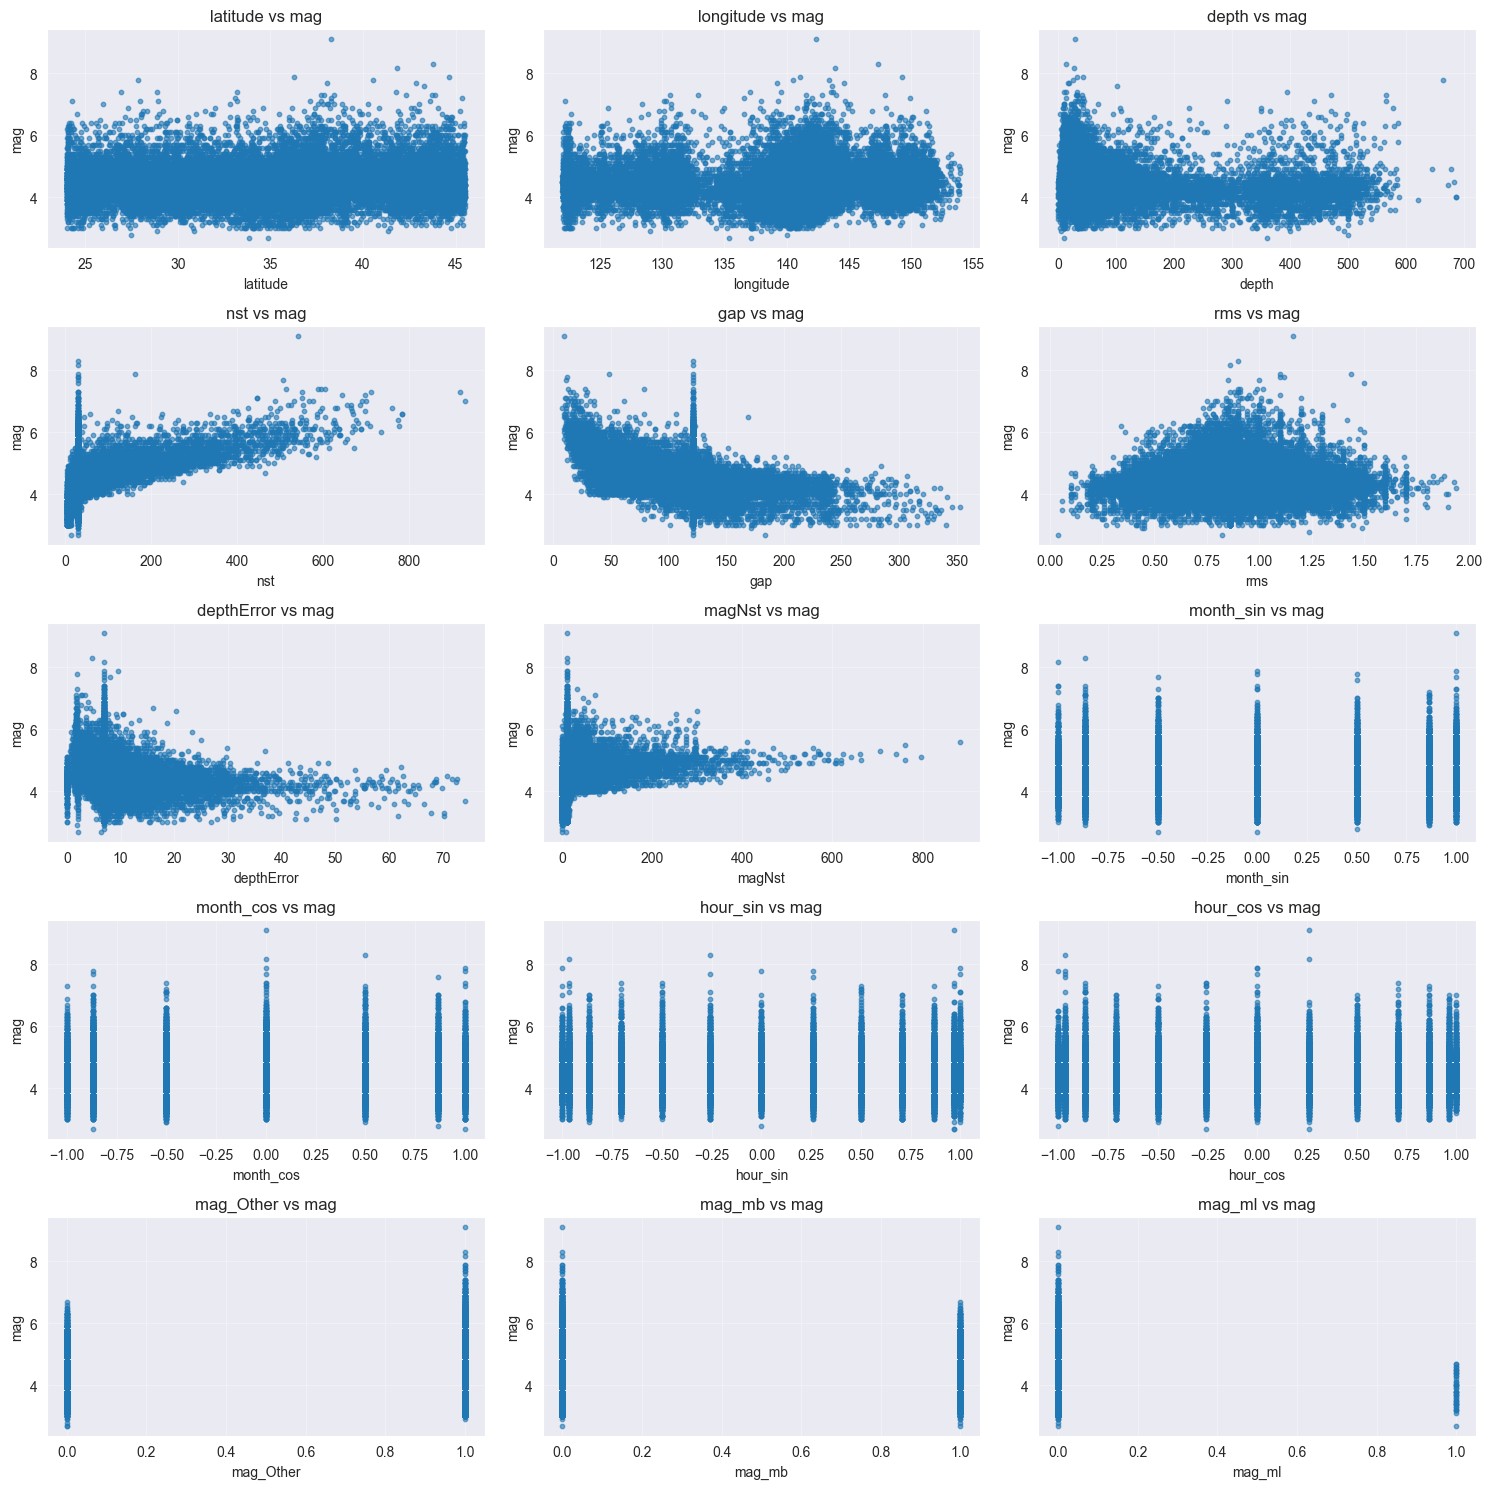

In [50]:
import math
# Define target and get numerical features
target = 'mag'
numerical_features = df_clean.select_dtypes(include=['float64', 'int64']).columns.tolist()
numerical_features.remove(target)

# Create scatter plots
plt.figure(figsize=(15, 3 * math.ceil(len(numerical_features) / 3)))

for i, col in enumerate(numerical_features):
    plt.subplot(math.ceil(len(numerical_features) / 3), 3, i + 1)
    plt.scatter(df_clean[col], df_clean[target], alpha=0.6, s=10)
    plt.xlabel(col)
    plt.ylabel(target)
    plt.title(f'{col} vs {target}')
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Save clean data set

In [51]:
df_clean = df_clean.drop(columns=['magType'])

In [52]:
df_clean.to_csv('cleaned_japan_earthquake.csv', index=False)

## 🦊